### Cálculo da força da barra, do momento do buckling e da velocidade circular

Andressa Wille, 07/03/2023

In [1]:
import matplotlib.pyplot as plt
import h5py
from numpy import *
import numpy as np
from bar_funcs import *

In [2]:
plt.rc('text', usetex=True)
plt.rcParams['font.size'] = 15

In [3]:
#caminhos
path_30 = 'bulge08/'
path_20 = 'vinte/'
path_10 = 'dez/'
paths = [path_30, path_20, path_10]

In [4]:
n_snapshots = 51

In [5]:
#arrays para força da barra

time_10 = np.empty(n_snapshots)
A2_10 = np.empty(n_snapshots)

time_20 = np.empty(n_snapshots)
A2_20 = np.empty(n_snapshots)

time_30 = np.empty(n_snapshots)
A2_30 = np.empty(n_snapshots)

In [6]:
#arrays para assimetria
S_10 = np.empty(n_snapshots)
S_20 = np.empty(n_snapshots)
S_30 = np.empty(n_snapshots)

In [7]:
#arrays para velocidade circular

v_c_disk_10 = np.empty(n_snapshots)
v_c_halo_10 = np.empty(n_snapshots)
v_c_10 = np.empty(n_snapshots)
r_10 = np.empty(n_snapshots)

v_c_disk_20 = np.empty(n_snapshots)
v_c_halo_20 = np.empty(n_snapshots)
v_c_20 = np.empty(n_snapshots)
r_20 = np.empty(n_snapshots)

v_c_disk_30 = np.empty(n_snapshots)
v_c_halo_30 = np.empty(n_snapshots)
v_c_30 = np.empty(n_snapshots)
r_30 = np.empty(n_snapshots)

In [8]:
#força da barra
for p, path in enumerate(paths):

    for j in range (0, n_snapshots):
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')

        #ler info tempo
        if p == 0:
            time_30[j] = round(f['Header'].attrs['Time'], 2)
        
        if p == 1:
            time_20[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 2:
            time_10[j] = round(f['Header'].attrs['Time'], 2)

        #ler info disco
        f_disk = f['PartType2']

        x_disk = np.array(f_disk['Coordinates'][:,0])
        y_disk = np.array(f_disk['Coordinates'][:,1])
        z_disk = np.array(f_disk['Coordinates'][:,2])
        m_disk = np.array(f_disk['Masses'])

        #corrigir posição
        x_new_disk, y_new_disk, z_new_disk = shift_com(m=m_disk, x=x_disk, y=y_disk, z=z_disk)
        
        #calcular força da barra
        if p == 0:
            A2_30[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 1:
            A2_20[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 2:
            A2_10[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)

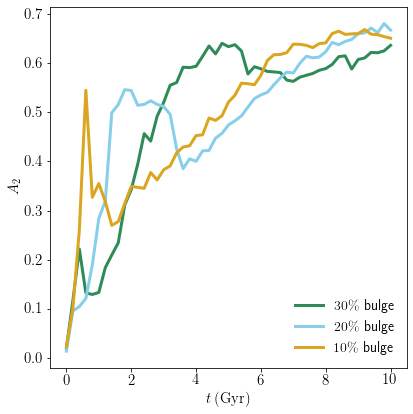

In [9]:
plt.figure(figsize=[6,6])
plt.plot(time_30, A2_30, color='seagreen', lw=3, label='$30\%$ bulge')
plt.plot(time_20, A2_20, color='skyblue', lw=3, label='$20\%$ bulge')
plt.plot(time_10, A2_10, color='goldenrod', lw=3, label='$10\%$ bulge')
plt.xlabel('$t \, \mathrm{(Gyr)}$', fontsize=15)
plt.ylabel('$A_2$', fontsize=15)
plt.legend(loc='lower right', frameon=False, fontsize=14)
plt.tight_layout()
plt.savefig('a2_bulges%.png')

In [10]:
#assimetria e buckling
for p, path in enumerate(paths):

    for j in range (0, n_snapshots):
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')

        #ler info disco
        f_disk = f['PartType2']

        x_disk = np.array(f_disk['Coordinates'][:,0])
        y_disk = np.array(f_disk['Coordinates'][:,1])
        z_disk = np.array(f_disk['Coordinates'][:,2])
        m_disk = np.array(f_disk['Masses'])

        #corrigir posição
        x_new_disk, y_new_disk, z_new_disk = shift_com(m=m_disk, x=x_disk, y=y_disk, z=z_disk)
        
        #selecionar partículas acima e abaixo de z=0
        up = np.argwhere(z_new_disk > 0).flatten()
        down = np.argwhere(z_new_disk < 0).flatten()
        
        x_up = x_new_disk[up]
        y_up = y_new_disk[up]
        m_up = m_disk[up]
        
        x_down = x_new_disk[down]
        y_down = y_new_disk[down]
        m_down = m_disk[down]
        
        #calcular assimetria
        if p == 0:
            S_30[j] = S(m_up, x_up, y_up, m_down, x_down, y_down, Rmax=15.0, Nbins=30, n_snapshots=n_snapshots)
        if p == 1:
            S_20[j] = S(m_up, x_up, y_up, m_down, x_down, y_down, Rmax=15.0, Nbins=30, n_snapshots=n_snapshots)  
        if p == 2:
            S_10[j] = S(m_up, x_up, y_up, m_down, x_down, y_down, Rmax=15.0, Nbins=30, n_snapshots=n_snapshots)
        

In [11]:
#momento do buckling
for p, path in enumerate(paths):
    if p == 0:
        time_b_30 = time_buckling(S_30, time_30)
        print(time_b_30)
    if p == 1:
        time_b_20 = time_buckling(S_20, time_20)
        print(time_b_20)
    if p == 2:
        time_b_10 = time_buckling(S_10, time_10)
        print(time_b_10)

5.4
3.2
9.8


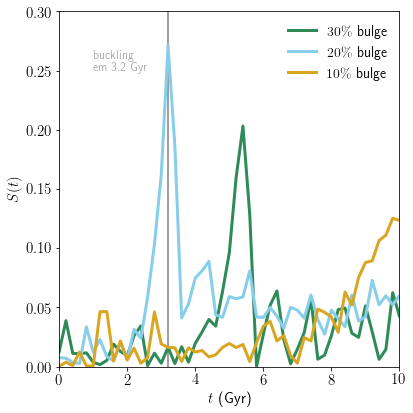

In [14]:
plt.figure(figsize=[6,6])
plt.plot(time_30, S_30, color='seagreen', lw=3, label='$30\%$ bulge')
plt.plot(time_20, S_20, color='skyblue', lw=3, label='$20\%$ bulge')

plt.vlines(time_b_20, -0.1, 0.3, 'grey')
plt.annotate(f'buckling \nem {time_b_20} Gyr', xy=(1, 0.25), fontsize=12, color='darkgrey')

plt.plot(time_10, S_10, color='goldenrod', lw=3, label='$10\%$ bulge')
plt.xlabel('$t$ (Gyr)', fontsize=15)
plt.ylabel('$S(t)$', fontsize=15)
plt.legend(loc='upper right', frameon=False, fontsize=14)
plt.ylim(0.0, 0.3)
plt.xlim(0.0, 10.0)
plt.tight_layout()
plt.savefig('s-bulges%.png')

In [15]:
#velocidade circular
for p, path in enumerate(paths):
    snapshot = path + f'snapshot_000.hdf5' # qual snapshot usar? t=10 Gyr???

    #ler snapshot
    f = h5py.File(snapshot, 'r')
    
    #ler info disco
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    m_disk = np.array(f_disk['Masses'])
        
    #ler info halo
    f_halo = f['PartType1']

    x_halo = np.array(f_halo['Coordinates'][:,0])
    y_halo = np.array(f_halo['Coordinates'][:,1])
    z_halo = np.array(f_halo['Coordinates'][:,2])
    m_halo = np.array(f_halo['Masses'])
    
    #corrigir posição
    x_new_disk, y_new_disk, z_new_disk, x_new_halo, y_new_halo, z_new_halo = shift_com_2(m_disk,
                                            x_disk, y_disk, z_disk, m_halo, x_halo, y_halo, z_halo)
    
    #calcular velocidade circular
    if p == 0:
        v_c_disk_30, v_c_halo_30, v_c_30, r_30 = v_circ(m_disk, m_halo, x_new_disk, y_new_disk,
                                z_new_disk, x_new_halo, y_new_halo, z_new_halo, Rmax=100.0, Nbins=200)
    if p == 1:
        v_c_disk_20, v_c_halo_20, v_c_20, r_20 = v_circ(m_disk, m_halo, x_new_disk, y_new_disk,
                                z_new_disk, x_new_halo, y_new_halo, z_new_halo, Rmax=100.0, Nbins=200)
    if p == 2:
        v_c_disk_10, v_c_halo_10, v_c_10, r_10 = v_circ(m_disk, m_halo, x_new_disk, y_new_disk,
                                z_new_disk, x_new_halo, y_new_halo, z_new_halo, Rmax=100.0, Nbins=200)

In [16]:
r = [r_30, r_20, r_10]
v_c_disk = [v_c_disk_30, v_c_disk_20, v_c_disk_10]
v_c_halo = [v_c_halo_30, v_c_halo_20, v_c_halo_10]
v_c = [v_c_30, v_c_20, v_c_10]

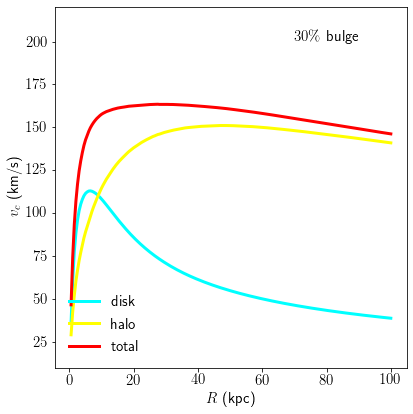

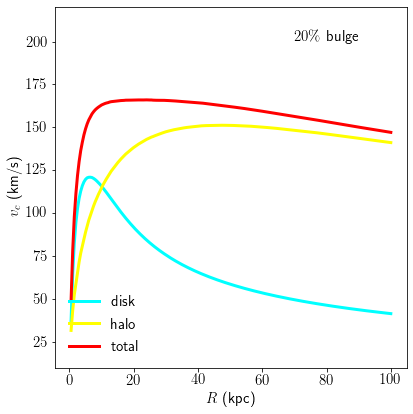

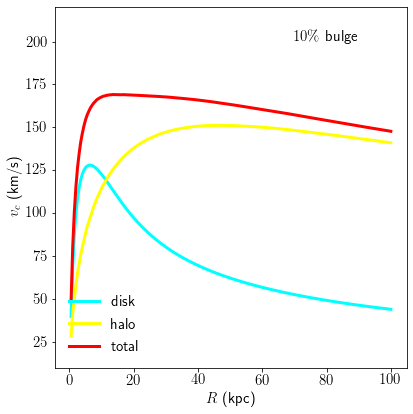

In [18]:
for i in range (0, 3):
    plt.figure(figsize=[6,6])
    plt.plot(r[i], v_c_disk[i], color='aqua', lw=3, label='disk')
    plt.plot(r[i], v_c_halo[i], color='yellow', lw=3, label='halo')
    plt.plot(r[i], v_c[i], color='red', lw=3, label='total')
    plt.xlabel('$R$ (kpc)', fontsize=15)
    plt.ylabel('$v_c$ (km/s)', fontsize=15)
    plt.legend(loc='lower left', frameon=False)
    plt.ylim(10, 220)
    
    if i == 0:
        text ='$30\%$ bulge'
    if i == 1:
        text ='$20\%$ bulge'
    if i == 2:
        text ='$10\%$ bulge'
        
    plt.text(70, 200, text, fontsize=15)
    
    plt.tight_layout()
    #plt.savefig(f'vc_bulges_{i}.png')